In [14]:
import pandas as pd


data = pd.read_csv("Earthquake data for SL-USGS 2.csv")

#check missing value
print(data.isnull().sum())

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                 55
gap                 55
dmin                57
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError     58
depthError           0
magError           112
magNst              87
status               0
locationSource       0
magSource            0
dtype: int64


In [15]:
from sklearn.impute import SimpleImputer

# Columns with missing values
numerical_columns = ['nst', 'gap', 'dmin', 'horizontalError', 'magNst']

# Initialize the imputer with median strategy
imputer = SimpleImputer(strategy='median')

# Impute missing values in the specified columns
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Drop 'magError' column due to excessive missing data
data = data.drop(columns=['magError'])

# Check if any missing values remain
print( data.isnull().sum())

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64


In [16]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
columns_to_scale = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'horizontalError', 'magNst']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# View the scaled data
print(data.head())

                       time  latitude  longitude     depth       mag magType  \
0  2025-05-12T00:41:44.392Z  0.370109  -0.867483  0.214859  0.544744     mww   
1  2025-05-11T22:04:56.051Z -0.728589  -1.796459 -0.470842  1.635155     mww   
2  2025-05-11T21:49:57.025Z  2.189095   1.135022 -0.470842  1.362552     mww   
3  2025-05-11T21:25:51.401Z  0.854378   0.668520 -0.470842  0.272141      mb   
4  2025-05-11T21:11:22.072Z  1.007721   0.379424 -0.479825  2.180361     mww   

        nst       gap      dmin   rms  ...          id  \
0  0.673775 -1.676491 -0.511003  0.67  ...  us7000pyqv   
1  0.184944 -0.535858  0.478880  0.75  ...  us7000pyqf   
2  0.967074 -0.705739  0.053216  0.54  ...  us7000pyqc   
3 -0.499421 -1.142578 -0.664832  0.90  ...  us7000pyq9   
4  1.495013 -1.239653 -0.332992  0.66  ...  us7000pyq7   

                    updated                             place        type  \
0  2025-05-12T02:27:22.774Z    33 km NNW of Güiria, Venezuela  earthquake   
1  2025-05-12T01

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'magType' and 'place' columns
data['magType'] = label_encoder.fit_transform(data['magType'])
data['place'] = label_encoder.fit_transform(data['place'])

# Check the data after label encoding
print(data.head())

                       time  latitude  longitude     depth       mag  magType  \
0  2025-05-12T00:41:44.392Z  0.370109  -0.867483  0.214859  0.544744        8   
1  2025-05-11T22:04:56.051Z -0.728589  -1.796459 -0.470842  1.635155        8   
2  2025-05-11T21:49:57.025Z  2.189095   1.135022 -0.470842  1.362552        8   
3  2025-05-11T21:25:51.401Z  0.854378   0.668520 -0.470842  0.272141        0   
4  2025-05-11T21:11:22.072Z  1.007721   0.379424 -0.479825  2.180361        8   

        nst       gap      dmin   rms  ...          id  \
0  0.673775 -1.676491 -0.511003  0.67  ...  us7000pyqv   
1  0.184944 -0.535858  0.478880  0.75  ...  us7000pyqf   
2  0.967074 -0.705739  0.053216  0.54  ...  us7000pyqc   
3 -0.499421 -1.142578 -0.664832  0.90  ...  us7000pyq9   
4  1.495013 -1.239653 -0.332992  0.66  ...  us7000pyq7   

                    updated place        type horizontalError  depthError  \
0  2025-05-12T02:27:22.774Z  5020  earthquake       -0.195686       5.359   
1  2025-05

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

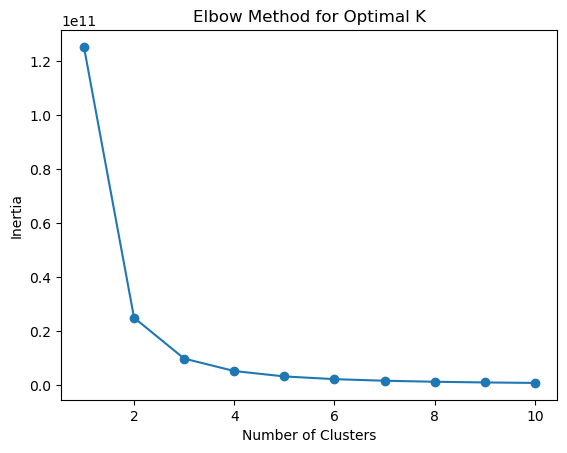

In [22]:
# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Trying K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_numeric)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns for clustering (X)
X_numeric = X.select_dtypes(include=['float64', 'int64'])  # Using numeric data for clustering

# Apply K-Means clustering with 3 clusters (Group 1: Low spenders, Group 2: Regular, Group 3: High-value)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_numeric)

# Check the cluster assignments
print(data[['cluster']].head())




   cluster
0        2
1        1
2        2
3        1
4        0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for K-Means clustering
sil_score = silhouette_score(X_numeric, data['cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6794603991634446


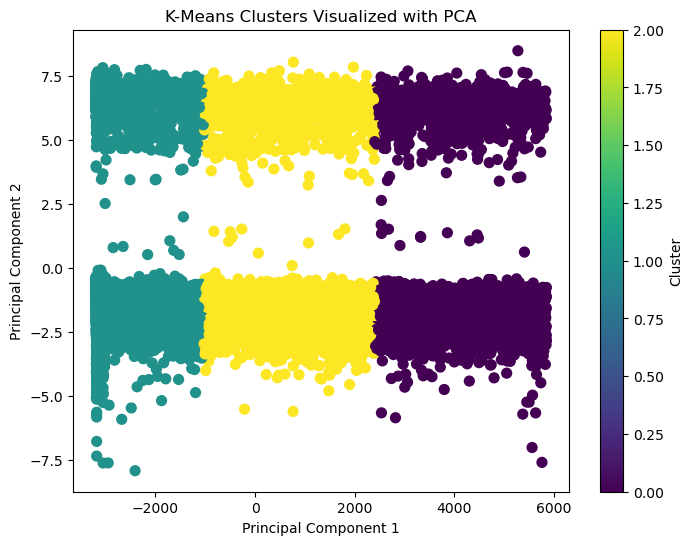

In [24]:


# Step 1: Reduce dimensions using PCA for visualization (2D)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_numeric)

# Create a dataframe for the reduced components and clusters
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = data['cluster']

# Step 2: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [25]:
# Check the summary statistics of each cluster
cluster_summary = data.groupby('cluster').describe()
print(cluster_summary)

        latitude                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         3776.0  0.233687  0.810238 -2.002964 -0.338566  0.015466  0.824791   
1         6555.0 -0.283083  1.109952 -2.579575 -1.051385 -0.395493  0.648642   
2         3771.0  0.258076  0.825106 -2.025550 -0.305140  0.284025  0.836710   

                  longitude            ...    magNst            hour_of_day  \
              max     count      mean  ...       75%        max       count   
cluster                                ...                                    
0        2.738244    3776.0  0.149816  ...  0.155958  11.523147      3776.0   
1        3.023878    6555.0 -0.158244  ...  0.016654  12.498274      6555.0   
2        2.747515    3771.0  0.125056  ...  0.239540  10.366926      3771.0   

                                            

In [29]:
# Assign labels based on the cluster number (adjust if needed)
def label_clusters(cluster):
    if cluster == 0:
        return 'High-risk zone'
    elif cluster == 1:
        return 'Medium-risk zone'
    else:
        return 'Low-risk zone'

# Apply the function to assign labels to each cluster
data['cluster_label'] = data['cluster'].apply(label_clusters)

# Check the updated data with cluster labels
print(data[['cluster', 'cluster_label']].head())


   cluster     cluster_label
0        2     Low-risk zone
1        1  Medium-risk zone
2        2     Low-risk zone
3        1  Medium-risk zone
4        0    High-risk zone


In [30]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(X_numeric, data['cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6794603991634446


In [33]:
print(data['cluster_label'].value_counts())

cluster_label
Medium-risk zone    6555
High-risk zone      3776
Low-risk zone       3771
Name: count, dtype: int64


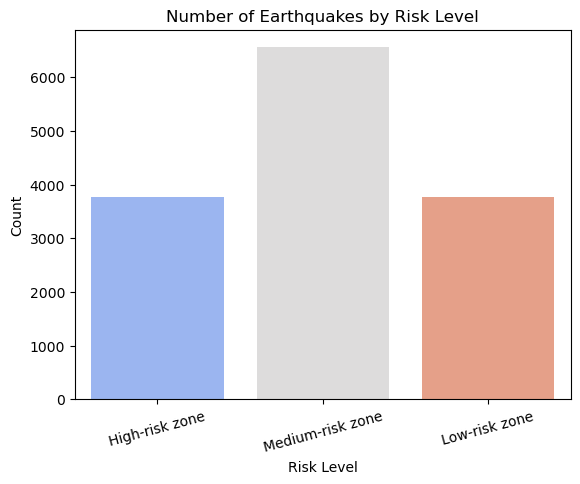

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='cluster_label', order=['High-risk zone', 'Medium-risk zone', 'Low-risk zone'], palette='coolwarm')
plt.title('Number of Earthquakes by Risk Level')
plt.ylabel('Count')
plt.xlabel('Risk Level')
plt.xticks(rotation=15)
plt.show()